In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Day 26: Dynamical Systems


We've seen dynamical systems earlier this semester. As a reminder, we are interested in the evolution of a state vector $\vec{x}$ over discrete time periods, where the elements of $\vec{x}$ change according to a transition matrix $A$ which remains constant. Such systems have lots of applications from biology and ecology, economics, brain modeling, epidemiology, modeling changes of opinion over time, evolution and genetic drift, and more.

Through the first half of this notebook, we'll use an example involving the spread of a conspiracy theory throughout a population as motivation. Our focus will be on the long-run behavior of the state vector. The second half of the notebook will investigate different scenarios for long-run behavior of solutions, including stable solutions, unstable solutions, and cyclical solutions.

Before we proceed, a few definitions are in order.

> **Definition (Fixed Point / Steady State):** Given a discrete dynamical system $\vec{x_{k+1}} = A\vec{x_k}$, a *fixed point* (or *steady state*) is a vector $\vec{x^*}$ such that $A\vec{x^*} = \vec{x^*}$.
>
>> **Note (Finding Steady States):** Every discrete dynamical system has at least one *steady state* -- the zero vector. It is possible for additional steady states to exist though. Since the steady state satisfies $A\vec{x^*} = \vec{x^*}$, we must have the following:
>> \begin{align*} A\vec{x^*} &= \vec{x^*}\\
\implies A\vec{x^*} - \vec{x^*} &= \vec{0}\\
\implies \left(A - I\right)\vec{x^*} &= \vec{0}
\end{align*}
>> This means that the *steady state* vector is an eigenvector corresponding to an eigenvalue of $\lambda = 1$.

> **Definition (Long-Run Behavior):** Given a discrete dynamical system $\vec{x_{k+1}} = A\vec{x_k}$, the long-run behavior of a solution (sequence of state vectors) beginning from initial state $\vec{x_0}$ is determined by $\displaystyle{\lim_{k\to \infty}{A^k\vec{x_0}} = \lim_{k\to \infty}{A\vec{x_k}}}$

### A Motivating Example

> **Example:** A new conspiracy is circulating throughout a population.
>
> <center>
> “The flouride that the government adds to our water is actually a remotely activated mind control serum.”
> </center>
>
> This idea, bizarre as it sounds, begins to gain traction online. Some citizens become believers, while others remain skeptical. Skeptics find conspiracy theory so outlandish that even they still talk about it — reposting memes, debunking videos, or arguing in the comments section. Believers, of course, continue to discuss the fluoride conspiracy, attempting to convince others that it's not a conspiracy at all -- it's real!
>
> Over time, these two groups influence one another: some *skeptics* fall down the rabbit hole, while some *believers* stop believing in the conspiracy theory either because of exposure to reliable information, boredom with the conspiracy, or otherwise.
>
> We measure time in days, and estimate the following transitions from one day to the next.
>
> + Within the community of *believers*, 85% will remain *believers*, while the remaining 15% will return to a *skeptical* standpoint.
> + Within the community of *skeptics*, 90% will remain *skeptical* while the remaining 10% will begin *believing* in the conspiracy.
>
> A group studying the conspiracy has further estimated that, currently, 5% of the population are *believers* The group is interested in modeling the spread of the conpiracy in the immediate future and then estimating the proportion of the population who will believe in the conspiracy in the long run.

We'll analyze the scenario and help the researchers throughout this notebook.

>> **Comment:** Since this notebook is another notebook where our primary focus will be on numerical computations, we'll utilize `{numpy}` rather than `{sympy}`. Below are descriptions of the `{numpy}` functionality we'll need.
>>
>> + We create vectors and matrices using `np.array()`
>> + We perform matrix multiplication using `np.matmul()`
>> + We calculate *eigenvalues* and *eigenvectors* using `np.linalg.eig()`

**Task 1:** Write the initial state vector $\vec{x_0}$ and the transition matrix $A$.

**Task 2:** Calculate the proportion of *believers* and *skeptics* on Day 1, Day 2, and Day 3.

Day 1: [[0.8625]
 [0.1375]]
Day 2: [[0.796875]
 [0.203125]]
Day 3: [[0.74765625]
 [0.25234375]]


**Task 3:** Use the code block below to Calculate the proportions of *believers* and *skeptics* over the first 60 days (approximately two months) and plot the results. Discuss what you are seeing.

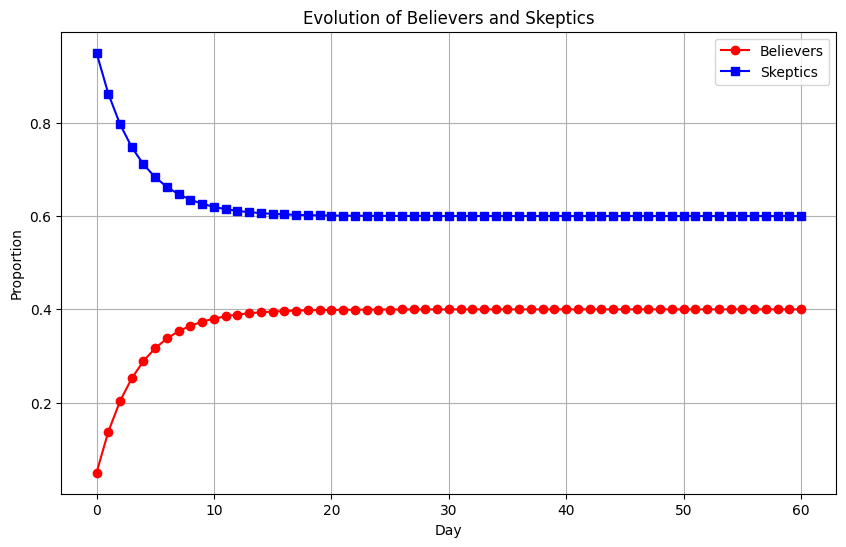

**Task 4:** Analyse the results further to calculate the proportion of *believers* and *skeptics* in the steady state (long-run). Do this by following the steps below.

+ Calculate the eigenvectors of the matrix $A$
+ Calculate the eigenvalues of the matrix $A$
+ Determine an eigenbasis for $\mathbb{R}^2$
+ Rewrite the initial state vector $\vec{x_0}$ as a linear combination of the vectors in the eigenbasis
+ Construct an expression for $\vec{x_{k+1}}$ given $\vec{x_k}$ that does not require matrix multiplication
+ Use what you know about *limits* (reach way back to Calculus I) to determine the state vector in the long-run by calculating $\displaystyle{\lim_{k\to \infty}{\vec{x_k}}}$

EigResult(eigenvalues=array([1.  , 0.75]), eigenvectors=array([[ 0.83205029, -0.70710678],
       [ 0.5547002 ,  0.70710678]]))

**Task 5:** Discuss any advantages or disadvantages you see to using this second, eigenvector/value approach rather than using the original approach via iterated matrix multiplication.

**Task 6:** Determine whether the initial distribution of *believers* and *skeptics* has any influence over the long-run, steady state.

### Section II

Having explored a discrete dynamical system, we are now prepared to investigate lots of interesting questions about discrete dynamical systems in general.

+ Is it always the case that a discrete dynamical system will converge to a single, stable steady state?
+ Is it possible that there are multiple different steady states and the one we arrive at is determined by the initial state?
+ If an initial state is "near" the steady state, will the system always converge to that nearby steady state?
+ Is it possible for a system to have no steady state for at least some initial state(s)?
+ Is it possible that we land in a cycle of states rather than a single steady state?
+ If at least some of these alternatives are possible, can we determine what type of behavior a discrete dynamical system will exhibit by analysing the transition matrix?

#### Eigenvalues and Characteristics of Solutions

A *solution* to a discrete dynamical system $\vec{x_{k+1}} = A\vec{x_k}$ is a sequence of state vectors. The characteristics/behavior of these solutions is determined by the eigenvalues corresponding to the matrix $A$.

+ If $\left|\lambda\right| < 1$ for all eigenvalues, then the system has a globally attractive *fixed point* at $\vec{0}$ -- all solutions converge to $\vec{0}$
+ If $\lambda = 1$ is an eigenvalue, then any vector in $E_\lambda$ (the eigenspace corresponding to $\lambda = 1$) is a *fixed point*.
+ If any eigenvalue $\lambda$ has $\left|\lambda\right| = 1$ and no eigenvalue has $\left|\lambda\right| > 1$, then the some solutions may oscillate or rotate but not converge to a fixed point.
+ If any eigenvalue $\lambda$ satisfies $\left|\lambda\right| > 1$, then solutions grow in magnitude along the directions associated with those eigenvalues and $\vec{0}$ becomes an unstable steady state (solutions are repelled from $\vec{0}$ unless they start exactly at $\vec{0}$).
+ If some eigenvalues satisfy $\left|\lambda\right| < 1$ and others satisfy $\left|\lambda\right| > 1$, then $\vec{0}$ is a *saddle point* and solutions are attracted to $\vec{0}$ along some directions byt repelled from it along others.


#### Analyzing Our Conspiracy

We know that the discrete dynamical system and initial state we used to model the spread of our conspiracy landed us into a steady state. Let's take another look at how that conspiracy theory spread through our population.

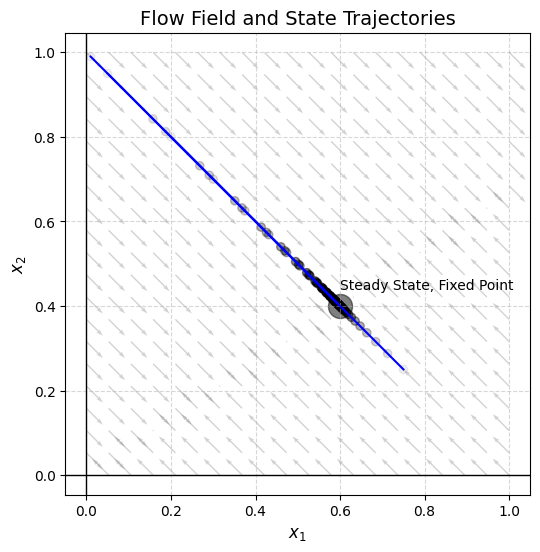

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt

# Define the system
A = np.array([[0.90, 0.15],
              [0.10, 0.85]])

def iterate_system(A, x0, steps):
    x = x0
    results = [x0.flatten()]
    for _ in range(steps):
        x = A @ x
        results.append(x.flatten())
    return np.array(results)

# Initial states for trajectories
initial_states = [
    np.array([[.01], [0.99]]),
    np.array([[0.05], [0.95]]),
    np.array([[0.20], [0.80]]),
    np.array([[0.50], [0.50]]),
    np.array([[0.75], [0.25]]),
]
steps = 15

# Set up the plot
plt.figure(figsize=(6, 6))

# Flow field: grid of points and their update directions
x_vals = np.linspace(0, 1, 20)
y_vals = np.linspace(0, 1, 20)
X, Y = np.meshgrid(x_vals, y_vals)

U = np.zeros_like(X)
V = np.zeros_like(Y)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        vec = np.array([[X[i, j]], [Y[i, j]]])
        new_vec = A @ vec
        diff = new_vec - vec
        U[i, j], V[i, j] = diff.flatten()

# Normalize vectors for display
magnitude = np.sqrt(U**2 + V**2)
U /= magnitude + 1e-8
V /= magnitude + 1e-8

plt.quiver(X, Y, U, V, angles='xy', scale=20, color='gray', alpha=0.35)

# Plot solution trajectories
for x0 in initial_states:
    states = iterate_system(A, x0, steps)
    states = np.hstack((states, np.array(list(range(steps + 1))).reshape(-1, 1)))
    plt.plot(states[:, 0], states[:, 1], color = "blue")
    plt.scatter(x = states[:, 0], y = states[:, 1], color = "black", alpha = (states[:, 2] + 1)/(steps + 1))


plt.scatter(0.6, 0.4, color = "black", s = 300, alpha = 0.5)

# Eigenvectors (scaled for visibility)
#plt.arrow(0, 0, 40, 20, head_width=4, head_length=6, fc='black', ec='black')
#plt.text(45, 22, 'Eigenvector ~ [2, 1]', fontsize=10)

#plt.arrow(0, 0, -20, 20, head_width=4, head_length=6, fc='gray', ec='gray')
#plt.text(-80, 22, 'Other eigenvector', fontsize=10, color='gray')

# Formatting
plt.axhline(y=0, color='black', linewidth=1)
plt.axvline(x=0, color='black', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.title('Flow Field and State Trajectories', fontsize=14)
plt.annotate("Steady State, Fixed Point", (0.6, 0.44))
#plt.legend()
plt.axis('equal')

plt.show()

**Task 1:** Determine the Eigenvalues corresponding to the matrix $A = \begin{bmatrix} 0.90 & 0.15\\ 0.10 & 0.85\end{bmatrix}$ and compare what we observed to the claimed behaviors in the bulleted list above.

**Task 2:** Consider the state transition matrices below. For each one, find any fixed points, identify all of the eigenvalues and eigenvectors for the matrix, and then plot the flow field and the first few states in several solution trajectories. Does what you are seeing match your expectations?

$$(i)~~A_1 = \begin{bmatrix} 0.9 & 0.8\\ 0.2 & 0.9\end{bmatrix}~~~~~(ii)~~A_2 = \begin{bmatrix} 1.2 & 0.3\\ 1.1 & 0.1\end{bmatrix}~~~~~(iii)~~A_3 = \begin{bmatrix} 0.5 & 0.2\\ 0.1 & 0.4\end{bmatrix}$$

$$(iv)~~A_4 = \begin{bmatrix} 1.2 & 0.3\\ 0.1 & 1.1\end{bmatrix}~~~~~(v)~~A_5 = \begin{bmatrix} 0.8 & -0.6\\ 0.1 & 0.8\end{bmatrix}$$

**Task 3:** Make slight changes to the transition matrices above. How do your changes impact the character of the solution trajectories?

**Application (Activity 4.4.5 from the text):** We are going to conduct an analysis to study the population of a bison herd. We divide the population of female bison into three groups: *juveniles* who are less than one year old; *yearlings* between one and two years old; and *adults* who are older than two years.

Each year,

+ 80% of the juveniles survive to become yearlings.
+ 90% of the yearlings survive to become adults.
+ 80% of the adults survive.
+ 40% of the adults give birth to a juvenile.

We let $J_k$, $Y_k$, and $A_k$ denote, respectively, the number of *juveniles*, *yearlings*, and *adults* in the population in year $k$. We write the vector $\vec{x_k} = \begin{bmatrix} J_k\\ Y_k\\ A_k\end{bmatrix}$ to store the population distribution in year $k$.

1. Write the state transition matrix $A$ which can be used to obtain $\vec{x_{k+1}}$ from $\vec{x_k}$.
2. Determine the fixed points for the discrete dynamical system $\vec{x_{k+1}} = A\vec{x_k}$. That is find the vector(s) $\vec{x^*}$ satisfying $A\vec{x^*} = \vec{x^*}$.
3. Find the eigenvalues and eigenvectors for the transition matrix $A$.
4. Use what you know about the behavior of two-dimensional systems to conjecture the behavior of this three-dimensional system.
5. Suppose that the birth rate decreases so that only 30% of adults give birth to a juvenile. How does this affect the long-term growth rate of the herd?
6. Suppose that the birth rate decreases further so that only 20% of adults give birth to a juvenile. How does this affect the long-term growth rate of the herd?
7. Find the smallest birth rate that supports a stable population.